# Doctest

Perhaps the simplest form of unit testing in Python is using a module in the standard library called `doctest`  The approach this module provides is unlike that in the other libraries we discuss, such as `unitttest`, `pytest`, or `hypothesis`.  

In most libraries, unit tests are identified by specially named functions, often starting with `test_`, or special classes, often starting with `Test`.  In contrast, in `doctest`, we include the tests in the docstrings for functions or modules themselves.  Some examples will make this more clear.

In [1]:
import doctest
from doctest import *
from itertools import product

%matplotlib inline
from visualize import visualize

## Writing first tests

The below function, `mandelbrot()` is a calculation of how many "orbits" the iterative function $z_{n+1}=z_{n}^{2}+c$ takes until a given point on the complex plane "escapes."  The *Mandelbrot Set* is the collection of only those points, $z_0$, that never diverge under this function.  Famously, the boundary of this set is a *fractal*, showing increasingly more details over every finite number of iterations.

In [2]:
# %load mandelbrot1.py
def mandelbrot(z0:complex, orbits:int=255) -> int:
    z = z0
    for n in range(orbits):
        if abs(z) > 2.0:
            return n
        z = z * z + z0
        
if __name__ == '__main__':
    print(mandelbrot(0.0965-0.638j))  # Should print 17

17


At first brush, this function seems to express the algorithm in question.  We might even utilize it to visualize the Mandelbrot set in the way art prints and screen savers often do.

In [3]:
help(visualize)

Help on function visualize in module visualize:

visualize(fn, x, y, size, pixels)
    Visualize an arbitrary function fn:ℂ🠖ℕ
    
    fn:     function visualized
    x:      lower-left (smallest) real coordinate
    y:      lower-left (smallest) imaginary coordinate
    size:   numeric range of value to plot in each coord
    pixels: size of generated graph in pixels (square)



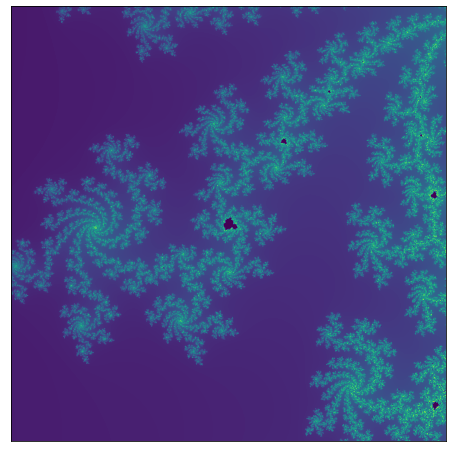

In [4]:
visualize(mandelbrot, 0.1015, -0.633, 0.01, 800) 

An improvement we might make to the `mandelbrot()` function is to add a docstring, and while we are at it, we can let that include some tests.  The tests are arrived at by exploring the function in an interactive interpreter.

In [5]:
# %load mandelbrot2.py
def mandelbrot(z0:complex, orbits:int=255) -> int:
    """Find the escape orbit of points under Mandelbrot iteration
    
    >>> mandelbrot(0.0965-0.638j)
    17
    
    # Might need to increase orbits to resolve some points
    >>> mandelbrot(0.106225-0.6376125j, orbits=1000)
    291

    # If z0 isn't coercible to complex, TypeError
    >>> mandelbrot('X')  
    Traceback (most recent call last):
      File "<stdin>", line 1, in <module>
      File "/home/davidmertz/git/INE/unittest/01-Doctest/mandelbrot1.py", line 4, in mandelbrot
        if abs(z) > 2.0:
    TypeError: bad operand type for abs(): 'str'
    
    # Orbits must be integer.  Traceback abbreviated below
    >>> mandelbrot(0.0965-0.638j, orbits=3.1) 
    Traceback (most recent call last):
    TypeError: 'float' object cannot be interpreted as an integer
    """
    z = z0
    for n in range(orbits):
        if abs(z) > 2.0:
            return n
        z = z * z + z0
        
if __name__ == '__main__':
    import doctest
    doctest.testmod()

## Module level tests

Often a doctest is best contained in the docstring of a particular function.  However, sometimes they make sense elsewhere within a module.  All docstrings are processed, whether attached to functions, classes, or at a module level. 

To demonstrate that, let us look at some toy functions, but tests that combine more than one function.  This gives us a chance as well to look at what test failures might look like as well.

In [6]:
"""Module docstring

>>> add(mul(4, 5), mul(3, 4))  # This passes
32
>>> mul(add(4, 5), add(3, 4))  # This fails
32
"""
def add(a, b): return a+b
def mul(a, b): return a*b

if __name__ == '__main__':
    import doctest; doctest.testmod()

**********************************************************************
File "__main__", line 6, in __main__
Failed example:
    mul(add(4, 5), add(3, 4))  # This fails
Expected:
    32
Got:
    63
**********************************************************************
1 items had failures:
   1 of   2 in __main__
***Test Failed*** 1 failures.


In [7]:
"""Module docstring

>>> add("X", 45)
Traceback (most recent call last):
ZeroDivisionError: division by zero
"""
def add(a, b): return a+b
def mul(a, b): return a*b

if __name__ == '__main__':
    import doctest; doctest.testmod(verbose=False)

**********************************************************************
File "__main__", line 4, in __main__
Failed example:
    add("X", 45)
Expected:
    Traceback (most recent call last):
    ZeroDivisionError: division by zero
Got:
    Traceback (most recent call last):
      File "/home/davidmertz/miniconda3/envs/INE/lib/python3.8/doctest.py", line 1336, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest __main__[0]>", line 1, in <module>
        add("X", 45)
      File "<ipython-input-7-907d321fa58c>", line 7, in add
        def add(a, b): return a+b
    TypeError: can only concatenate str (not "int") to str
**********************************************************************
1 items had failures:
   1 of   1 in __main__
***Test Failed*** 1 failures.


If an expected exception is encountered, the test will pass.

In [8]:
"""Module docstring

>>> add("X", 45)
Traceback (most recent call last):
TypeError: can only concatenate str (not "int") to str
"""
def add(a, b): return a+b
def mul(a, b): return a*b

if __name__ == '__main__':
    import doctest; doctest.testmod()

## Textual Comparisons

The comparisons made by `doctest` are string based.  This can sometimes nuance writing the correct shell lines.  For example,

In [9]:
def cartesian_set(a, b):
    """Python does not guarantee set order
    
    >>> cartesian_set([1, 2], [3, 4, 5])
    {(1, 3), (2, 3), (1, 4), (2, 4), (1, 5), (2, 5)}
    """
    return set(product(a, b))

if __name__ == '__main__':
    import doctest; doctest.testmod()

**********************************************************************
File "__main__", line 4, in __main__.cartesian_set
Failed example:
    cartesian_set([1, 2], [3, 4, 5])
Expected:
    {(1, 3), (2, 3), (1, 4), (2, 4), (1, 5), (2, 5)}
Got:
    {(2, 4), (1, 5), (1, 4), (2, 3), (2, 5), (1, 3)}
**********************************************************************
1 items had failures:
   1 of   1 in __main__.cartesian_set
***Test Failed*** 1 failures.


We can easily fix this to perform the test we actually intend.

In [10]:
def cartesian_set(a, b):
    """Python does not guarantee set order
    
    >>> expected = {(1, 3), (2, 3), (1, 4), (2, 4), (1, 5), (2, 5)}
    >>> cartesian_set([1, 2], [3, 4, 5]) == expected
    True
    """
    return set(product(a, b))

if __name__ == '__main__':
    import doctest; doctest.testmod()

Similar minor reformulation to write Python lines with deterministic results can require a little extra effort.  Things like object ids, file handle numbers, memory locations, etc. will definitely change each run.  In those cases, think about printing something that will be invariant about the object in question and cause that to be output.

You may have noticed, however, that `doctest` makes extra efforts to do fuzzy matching on exceptions.  For example, when you run this code on your own system, your exceptions will most certainly not contain the path `/home/davidmertz/miniconda3/envs/INE/lib/python3.8/doctest.py` as mine do.  In general, only the `Traceback` prefix and a subsequent lines indicating the type and message of an exception are analyzed.  

You can make matching somewhat fuzzier elsewhere by using some option flags.  I generally recommend several of these, even though they are not default.

In [11]:
def cartesian_set(a, b):
    """Python does not guarantee set order
    
    >>> sorted(cartesian_set([1, 2], [3, 4, 5]))
    [(1, 3),  (1, 4), (1, 5), (2, 3), (2, 4), (2, 5)]
    """
    return set(product(a, b))

if __name__ == '__main__':
    import doctest; doctest.testmod()

**********************************************************************
File "__main__", line 4, in __main__.cartesian_set
Failed example:
    sorted(cartesian_set([1, 2], [3, 4, 5]))
Expected:
    [(1, 3),  (1, 4), (1, 5), (2, 3), (2, 4), (2, 5)]
Got:
    [(1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5)]
**********************************************************************
1 items had failures:
   1 of   1 in __main__.cartesian_set
***Test Failed*** 1 failures.


Above we encounted a failure **only** because the spacing was different in the output than in the default shell `repr`.  It is a good idea to allow such incidental differences.

In [12]:
def cartesian_set(a, b):
    """Python does not guarantee set order
    
    >>> sorted(cartesian_set([1, 2], [3, 4, 5]))
    [(1, 3),  (1, 4), (1, 5), (2, 3), (2, 4), (2, 5)]
    """
    return set(product(a, b))

if __name__ == '__main__':
    import doctest; 
    doctest.testmod(optionflags=REPORT_NDIFF)

**********************************************************************
File "__main__", line 4, in __main__.cartesian_set
Failed example:
    sorted(cartesian_set([1, 2], [3, 4, 5]))
Differences (ndiff with -expected +actual):
    - [(1, 3),  (1, 4), (1, 5), (2, 3), (2, 4), (2, 5)]
    ?          -
    + [(1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5)]
**********************************************************************
1 items had failures:
   1 of   1 in __main__.cartesian_set
***Test Failed*** 1 failures.


Using the "ndiff" style makes small differences more clear ("udiff" and "cdiff" are also available).  However, probably better still is just silencing such (usually) unimportant differences.

In [13]:
def cartesian_set(a, b):
    """Python does not guarantee set order
    
    >>> sorted(cartesian_set(2, [3, 4, 5]))
    Traceback (most recent call last):
    TypeError: some kind of TypeError
    """
    return set(product(a, b))

if __name__ == '__main__':
    import doctest; 
    doctest.testmod(optionflags=NORMALIZE_WHITESPACE|IGNORE_EXCEPTION_DETAIL)

In [14]:
def cartesian_set(a, b):
    """Python does not guarantee set order

    # Don't bother comparing all 25 pairs (just first few)
    >>> sorted(cartesian_set([1, 2, 3, 4, 5], [6, 7, 8, 9, 0]))
    [(1, 0),
     (1, 6),
     (1, 7),
     (1, 8),
     (1, 9),
     (2, 0),
     (2, 6),
     ...]
    """
    return set(product(a, b))

if __name__ == '__main__':
    import doctest; 
    doctest.testmod(optionflags=NORMALIZE_WHITESPACE|ELLIPSIS)

## Testing from a file

We may also run tests that are contained in a documentation file.  These files might be in Markdown, or in reStructuredText, or in other textual formats.  The `doctest` parser simply looks for lines beginning with the Python shell prefix `>>>` or continuation lines `...`, perhaps after whitespace indentation.  Such documentation is free to contain as much non-tested documentation as is relevant as well; it can be the primary source for project documentation.

It turns out that even though we did not detect it earlier, the `mandelbrot()` function has a bug.  Let us put more extensive tests in a separate document, `Mandelbrot.md`

The function, `mandelbrot()` is a calculation of how many "orbits" the 
iterative function $z_{n+1}=z_{n}^{2}+c$ takes until a given point on 
the complex plane "escapes."  The *Mandelbrot Set* is the collection of 
only those points, $z_0$, that never diverge under this function.
Famously, the boundary of this set is a *fractal*, showing increasingly 
more details over every finite number of iterations.

    # Do we calculate escape for every point?
    >>> from random import random
    >>> from mandelbrot1 import mandelbrot
    
    # We wish to try a large number of points
    >>> escapes = []
    >>> for _ in range(100_000):
    ...     real = random() * 4 - 2
    ...     imag = random() * 4 - 2
    ...     z0 = complex(real, imag)
    ...     escapes.append(mandelbrot(z0, orbits=1000))
    
    # Do we always get good values?
    >>> all(0 <= esc <= 255 for esc in escapes)
    True

In [19]:
# The file actually only loops 5 times for demonstration
doctest.testfile('Mandelbrot.md', module_relative=False)

**********************************************************************
File "Mandelbrot.md", line 21, in Mandelbrot.md
Failed example:
    all(0 <= esc <= 255 for esc in escapes)
Exception raised:
    Traceback (most recent call last):
      File "/home/davidmertz/miniconda3/envs/INE/lib/python3.8/doctest.py", line 1336, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest Mandelbrot.md[4]>", line 1, in <module>
        all(0 <= esc <= 255 for esc in escapes)
      File "<doctest Mandelbrot.md[4]>", line 1, in <genexpr>
        all(0 <= esc <= 255 for esc in escapes)
    TypeError: '<=' not supported between instances of 'int' and 'NoneType'
**********************************************************************
1 items had failures:
   1 of   5 in Mandelbrot.md
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=5)